In [57]:
import numpy as np
import string
import json
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Bidirectional, GlobalMaxPool1D
from keras.layers.core import SpatialDropout1D
from sklearn.model_selection import StratifiedKFold
from keras.datasets import imdb
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import model_from_json

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

from gensim import corpora
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [58]:
with open('labeled_document_firstIter.json') as json_data:
        allTrainData = json.load(json_data)
with open('labeled_document_seconditer.json') as json_data:
        allTrainData2 = json.load(json_data)
postProcessedTrainPhrases = []
# trainPhrases, testPhrases, trainLabel,testLabel = train_test_split(allTrainData['Comment'], allTrainData['CommentLabel'], test_size=0.2, random_state=42)
trainPhrases, testPhrases, trainLabel,testLabel = train_test_split(allTrainData['Comment'] + allTrainData2['Comment'], allTrainData['CommentLabel']+allTrainData2['CommentLabel'], test_size=0.2, random_state=42)

#     print(testPhrases[0:100])

In [59]:
vectorizer = TfidfVectorizer(sublinear_tf = True,
                                 max_df = 0.5,
                                 stop_words = 'english')
features_train = vectorizer.fit_transform(trainPhrases)


labels_train   = trainLabel

clf = RandomForestClassifier()
clf.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
# top_features = [(number, feature, vectorizer.get_feature_names()[number]) \
#                 for number, feature in zip(range(len(clf.feature_importances_)), clf.feature_importances_) ]

# for i in range(0,100):
#     feature = clf.feature_importances_[i]
#     print(feature)
#     print(vectorizer.get_feature_names()[i])

data = sorted(zip(clf.feature_importances_, vectorizer.get_feature_names()), reverse=True)[:200]
feature_data = {}
for d in data:
    feature_data[d[1]] = float(d[0])
print(type(list(feature_data.keys())))
print(type(feature_data.values()))

<class 'list'>
<class 'dict_values'>


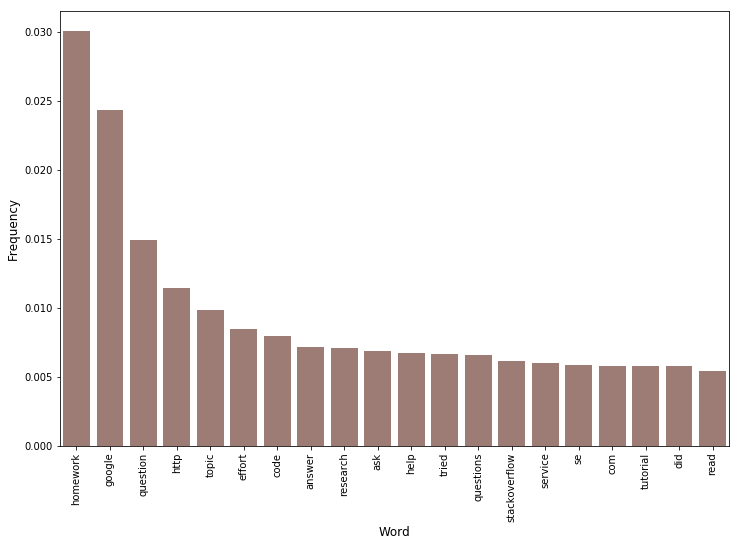

In [61]:

plt.figure(figsize=(12,8))
sns.barplot(list(feature_data.keys())[:20], list(feature_data.values())[:20], alpha=0.8, color=color[5])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

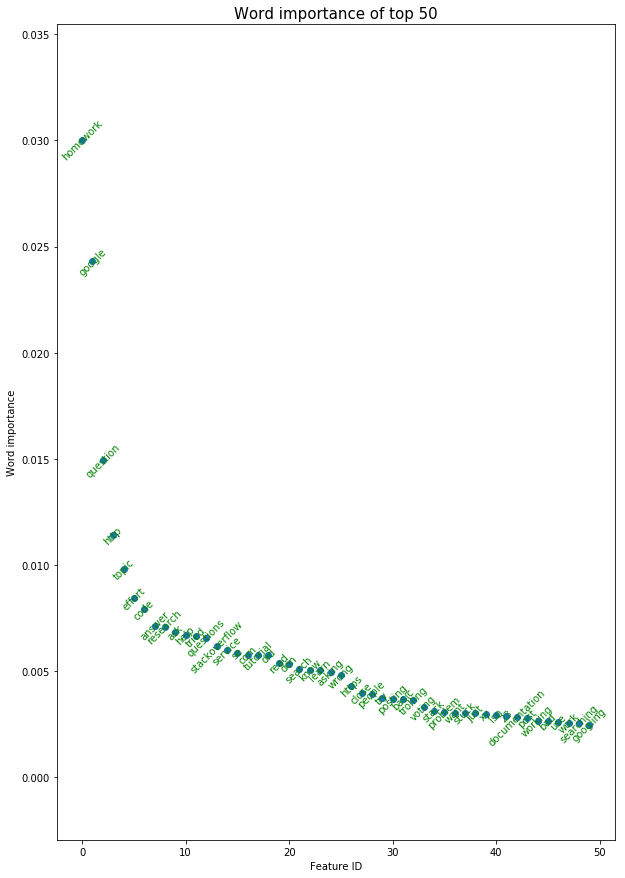

In [62]:
fig, ax = plt.subplots(figsize=(10,15))
feature_id = range(0,50)
ax.scatter(feature_id, list(feature_data.values())[:50])
for i, txt in enumerate(list(feature_data.keys())[:50]):
    ax.annotate(txt, (feature_id[i],list(feature_data.values())[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Feature ID')
plt.ylabel('Word importance')
plt.title("Word importance of top 50", fontsize=15)
plt.show()

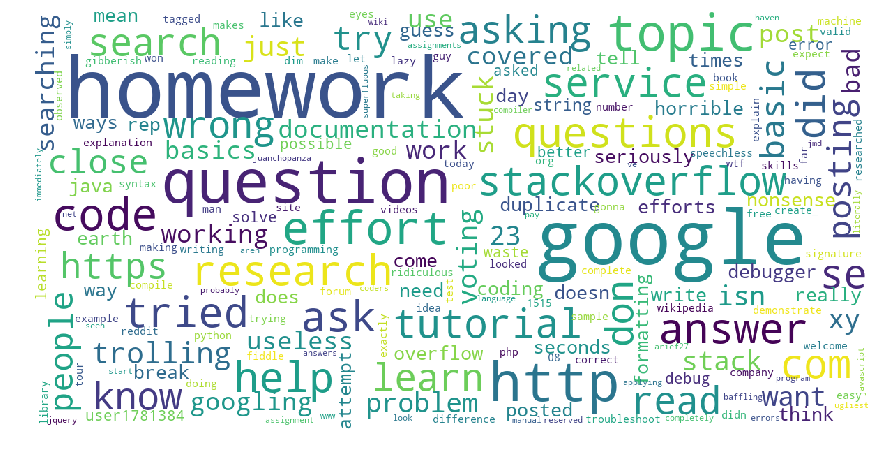

In [63]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate_from_frequencies(data)

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(feature_data)